In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unrar x -Y "/content/drive/MyDrive/Dataset/EMG_Signals/EMG Physical Action Data Set.rar" "/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset"

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# import timeit

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   print(
#       '\n\nThis error most likely means that this notebook is not '
#       'configured to use a GPU.  Change this in Notebook Settings via the '
#       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
#   raise SystemError('GPU device not found')

# def cpu():
#   with tf.device('/cpu:0'):
#     random_image_cpu = tf.random.normal((100, 100, 100, 3))
#     net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
#     return tf.math.reduce_sum(net_cpu)

# def gpu():
#   with tf.device('/device:GPU:0'):
#     random_image_gpu = tf.random.normal((100, 100, 100, 3))
#     net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
#     return tf.math.reduce_sum(net_gpu)
  
# cpu()
# gpu()

# print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
#       '(batch x height x width x channel). Sum of ten runs.')
# print('CPU (s):')
# cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
# print(cpu_time)
# print('GPU (s):')
# gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
# print(gpu_time)
# print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_root = os.path.join('.', "/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset")
print(dataset_root)

/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset


In [ ]:
data_sub_folders = ["sub1", "sub2", "sub3", "sub4"] 
print(data_sub_folders)

agg_classes_dict = {
    "Elbowing": 0,
    "Frontkicking": 1,
    "Hamering": 2,
    "Headering": 3,
    "Kneeing": 4,
    "Pulling": 5,
    "Punching": 6,
    "Pushing": 7,
    "Sidekicking": 8,
    "Slapping": 9
}
norm_classes_dict = {
    "Bowing": 10,
    "Clapping": 11,
    "Handshaking": 12,
    "Hugging": 13,
    "Jumping": 14,
    "Running": 15,
    "Seating": 16,
    "Standing": 17,
    "Walking": 18,
    "Waving": 19
}
col_names = ['R-Bic', 'R-Tri', 'L-Bic', 'L-Tri', 'R-Thi', 'R-Ham', 'L-Thi', 'L-Ham']
col_dtypes = dict()
for col in col_names:
    col_dtypes[col] = np.int32

data_classes_files_dict = dict()

['sub1', 'sub2', 'sub3', 'sub4']


In [ ]:

df = pd.DataFrame()

for type_, category_folder, category_dict in zip(["Aggressive", "Normal"], ["Aggressive/txt/", "Normal/txt/"],
                                                 [agg_classes_dict, norm_classes_dict]):
    for cls, id in category_dict.items():
        for folder in data_sub_folders:
            txt_file = os.path.join(dataset_root, folder, category_folder, cls + '.txt')
            print("Processing txt_file: {}".format(txt_file))
            df_cur = pd.read_csv(txt_file, delim_whitespace=True,
                                 header=None,
                                 names=col_names,
                                 dtype=col_dtypes)
            df_cur = df_cur.assign(type=type_)
            df_cur = df_cur.assign(cls_id=id)
            df_cur = df_cur.assign(cls_name=cls)
            df_cur = df_cur.assign(sub_id=folder)
            df = df.append(df_cur, ignore_index=True, verify_integrity=True)

Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub1/Aggressive/txt/Elbowing.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub2/Aggressive/txt/Elbowing.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub3/Aggressive/txt/Elbowing.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub4/Aggressive/txt/Elbowing.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub1/Aggressive/txt/Frontkicking.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub2/Aggressive/txt/Frontkicking.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub3/Aggressive/txt/Frontkicking.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub4/Aggressive/txt/Frontkicking.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub1/Aggressive/txt/Hamering.txt
Pro

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797426 entries, 0 to 797425
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   R-Bic     797426 non-null  int32 
 1   R-Tri     797426 non-null  int32 
 2   L-Bic     797426 non-null  int32 
 3   L-Tri     797426 non-null  int32 
 4   R-Thi     797426 non-null  int32 
 5   R-Ham     797426 non-null  int32 
 6   L-Thi     797426 non-null  int32 
 7   L-Ham     797426 non-null  int32 
 8   type      797426 non-null  object
 9   cls_id    797426 non-null  int64 
 10  cls_name  797426 non-null  object
 11  sub_id    797426 non-null  object
dtypes: int32(8), int64(1), object(3)
memory usage: 48.7+ MB


In [ ]:
sub = "sub1"
action = "Elbowing"
action_type = "Aggressive"
channel = "L-Thi"

mask = (df["sub_id"] == sub) & (df["cls_name"] == action) & (df["type"] == action_type)
sub_sample_df = df[mask]

sub_sample_df

,R-Bic,R-Tri,L-Bic,L-Tri,R-Thi,R-Ham,L-Thi,L-Ham,type,cls_id,cls_name,sub_id
0,-245,266,2615,-29,-4000,-549,-4000,4000,Aggressive,0,Elbowing,sub1
1,-814,391,-22,-277,-4000,-130,-4000,4000,Aggressive,0,Elbowing,sub1
2,-445,257,-3628,-428,-4000,97,-4000,4000,Aggressive,0,Elbowing,sub1
3,-844,201,-4000,-498,-4000,62,-4000,4000,Aggressive,0,Elbowing,sub1
4,-1996,233,-4000,-552,-4000,109,-4000,4000,Aggressive,0,Elbowing,sub1
...,...,...,...,...,...,...,...,...,...,...,...,...
9767,-1858,256,3137,12,692,-501,-4000,-2003,Aggressive,0,Elbowing,sub1
9768,-1019,269,2486,-85,600,-487,-4000,-2087,Aggressive,0,Elbowing,sub1
9769,-54,250,1619,-141,1032,-615,-4000,-2116,Aggressive,0,Elbowing,sub1
9770,425,298,-697,-173,2363,-631,-3924,-2140,Aggressive,0,Elbowing,sub1


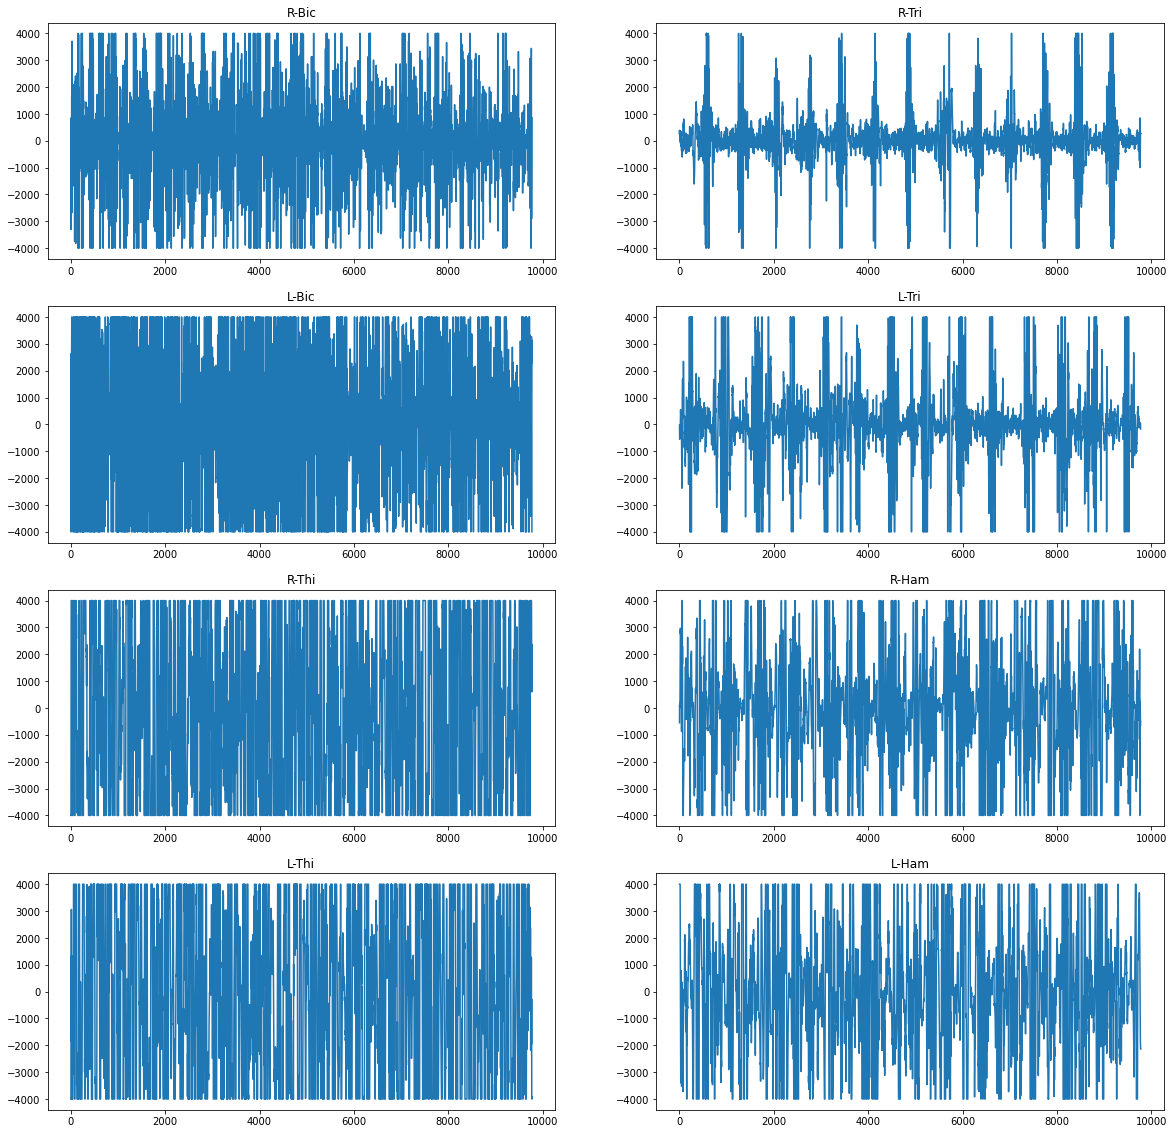

In [ ]:
num_rows = 4
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,20))

i=0
j=0
for index, col in enumerate(col_names):
    axs[i, j].plot(sub_sample_df[col])
    axs[i, j].set_title(col)
    j+=1
    if j%num_cols == 0:
        j=0
        i+=1

In [ ]:
df["type_cls_name"] = df["type"]+"_"+df["cls_name"]

In [ ]:
df

,R-Bic,R-Tri,L-Bic,L-Tri,R-Thi,R-Ham,L-Thi,L-Ham,type,cls_id,cls_name,sub_id,type_cls_name
0,-245,266,2615,-29,-4000,-549,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
1,-814,391,-22,-277,-4000,-130,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
2,-445,257,-3628,-428,-4000,97,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
3,-844,201,-4000,-498,-4000,62,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
4,-1996,233,-4000,-552,-4000,109,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797421,-284,-13,10,-60,13,-5,13,-13,Normal,19,Waving,sub4,Normal_Waving
797422,-431,10,4,-45,11,5,12,-13,Normal,19,Waving,sub4,Normal_Waving
797423,-562,9,1,-32,15,5,-11,-10,Normal,19,Waving,sub4,Normal_Waving
797424,-826,-12,2,-40,9,16,-50,-20,Normal,19,Waving,sub4,Normal_Waving


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df[col_names] = scaler.fit_transform(df[col_names])

In [ ]:
df

,R-Bic,R-Tri,L-Bic,L-Tri,R-Thi,R-Ham,L-Thi,L-Ham,type,cls_id,cls_name,sub_id,type_cls_name
0,0.469375,0.533250,0.826875,0.496375,0.000000,0.431375,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
1,0.398250,0.548875,0.497250,0.465375,0.000000,0.483750,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
2,0.444375,0.532125,0.046500,0.446500,0.000000,0.512125,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
3,0.394500,0.525125,0.000000,0.437750,0.000000,0.507750,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
4,0.250500,0.529125,0.000000,0.431000,0.000000,0.513625,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797421,0.464500,0.498375,0.501250,0.492500,0.501625,0.499375,0.501625,0.498375,Normal,19,Waving,sub4,Normal_Waving
797422,0.446125,0.501250,0.500500,0.494375,0.501375,0.500625,0.501500,0.498375,Normal,19,Waving,sub4,Normal_Waving
797423,0.429750,0.501125,0.500125,0.496000,0.501875,0.500625,0.498625,0.498750,Normal,19,Waving,sub4,Normal_Waving
797424,0.396750,0.498500,0.500250,0.495000,0.501125,0.502000,0.493750,0.497500,Normal,19,Waving,sub4,Normal_Waving


In [ ]:
df.to_csv("/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/emg_dataset.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/emg_dataset.csv")

In [ ]:
################################################### ONLY ON ONE SUB TILL MORE MEMORY
df = df[df["sub_id"]=="sub1"]
################################################### ONLY ON ONE SUB TILL MORE MEMORY

In [ ]:
from collections import Counter

Counter(df["type_cls_name"])

Counter({'Aggressive_Elbowing': 9772,
         'Aggressive_Frontkicking': 9811,
         'Aggressive_Hamering': 10000,
         'Aggressive_Headering': 10000,
         'Aggressive_Kneeing': 10000,
         'Aggressive_Pulling': 9659,
         'Aggressive_Punching': 9637,
         'Aggressive_Pushing': 9676,
         'Aggressive_Sidekicking': 9829,
         'Aggressive_Slapping': 9788,
         'Normal_Bowing': 9830,
         'Normal_Clapping': 10000,
         'Normal_Handshaking': 9611,
         'Normal_Hugging': 9756,
         'Normal_Jumping': 10000,
         'Normal_Running': 9964,
         'Normal_Seating': 10000,
         'Normal_Standing': 9725,
         'Normal_Walking': 10000,
         'Normal_Waving': 10000})

In [ ]:
dataset_root = os.path.join('.', "/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset")

data_sub_folders = ["sub1", "sub2", "sub3", "sub4"] 
print(data_sub_folders)

agg_classes_dict = {
    "Elbowing": 0,
    "Frontkicking": 1,
    "Hamering": 2,
    "Headering": 3,
    "Kneeing": 4,
    "Pulling": 5,
    "Punching": 6,
    "Pushing": 7,
    "Sidekicking": 8,
    "Slapping": 9
}
norm_classes_dict = {
    "Bowing": 10,
    "Clapping": 11,
    "Handshaking": 12,
    "Hugging": 13,
    "Jumping": 14,
    "Running": 15,
    "Seating": 16,
    "Standing": 17,
    "Walking": 18,
    "Waving": 19
}

['sub1', 'sub2', 'sub3', 'sub4']


In [ ]:
y_col = "type_cls_name"
type_cls_name_unique = np.unique(df[y_col].values)
sub_id_unique = np.unique(df["sub_id"].values)

x_cols = ["R-Bic", "R-Tri", "L-Bic", "L-Tri", "R-Thi", "R-Ham", "L-Thi", "L-Ham"]

n_steps_in = 256

In [ ]:
def split_sequence(sequence, label, n_steps_in):
  data_x, data_y = [], []
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    if end_ix > len(sequence):
        break

    seq_x = sequence[i:end_ix]
    data_x.append(seq_x)
    data_y.append(label)
  return np.array(data_x), np.array(data_y)

In [ ]:
def load_x_y_dataset_windowing(tmp_df, n_steps_in):
  X_dataset = []
  y_dataset = []

  for s in sub_id_unique:
      for tc in type_cls_name_unique:
          mask = (tmp_df["sub_id"] == s) & (tmp_df["type_cls_name"] == tc)
          sub_values = tmp_df[mask][x_cols].values
          x, y = split_sequence(sub_values, tc, n_steps_in)
          X_dataset.extend(x)
          y_dataset.extend(y)
  return np.array(X_dataset), np.array(y_dataset)

In [ ]:
with tf.device('/device:GPU:0'):
  X_dataset, y_dataset = load_x_y_dataset_windowing(df, n_steps_in)

In [ ]:
#del df

In [ ]:
X_dataset.shape, y_dataset.shape

((191958, 256, 8), (191958,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, shuffle=True, 
                                                    test_size=0.2, random_state=1, stratify=y_dataset)

In [ ]:
del X_dataset
del y_dataset

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((153566, 256, 8), (153566,), (38392, 256, 8), (38392,))

In [ ]:
# X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
# X_test = X_train.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((153566, 256, 8), (153566,), (38392, 256, 8), (38392,))

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

20

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
y_train.shape, y_test.shape

((153566, 20), (38392, 20))

In [ ]:
X_train.shape, X_test.shape

((153566, 256, 8), (38392, 256, 8))

In [ ]:
input_shape = X_train.shape[1:]
input_shape

(256, 8)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report

def print_score(y_pred, y_real):
    print("Accuracy: ", accuracy_score(y_real, y_pred))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    print(confusion_matrix(y_real, y_pred))

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

In [ ]:
!pip install livelossplot

In [ ]:
import keras.backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from keras.layers import Conv1D, MaxPool1D, Concatenate, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras
import time

In [ ]:
class Classifier_INCEPTION:
    def __init__(self, weights_directory, input_shape, nb_classes, verbose=False, build=True, batch_size=64,
                 nb_filters=32, use_residual=True, use_bottleneck=True, depth=10, kernel_size=41, nb_epochs=50):
        self.weights_directory = weights_directory
        self.nb_filters = nb_filters
        self.use_residual = use_residual
        self.use_bottleneck = use_bottleneck
        self.depth = depth
        self.kernel_size = kernel_size - 1
        self.callbacks = None
        self.batch_size = batch_size
        self.bottleneck_size = 32
        self.nb_epochs = nb_epochs

        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose

    def _inception_module(self, input_tensor, stride=1, activation='linear'):

        if self.use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=self.bottleneck_size, kernel_size=1,
                                     padding='same', activation=activation, use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_size_s = [self.kernel_size // (2 ** i) for i in range(3)]

        conv_list = []

        for i in range(len(kernel_size_s)):
            conv_list.append(Conv1D(filters=self.nb_filters, kernel_size=kernel_size_s[i],
                                    strides=stride, padding='same', activation=activation, use_bias=False)(
                input_inception))

        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_6 = Conv1D(filters=self.nb_filters, kernel_size=1,
                        padding='same', activation=activation, use_bias=False)(max_pool_1)

        conv_list.append(conv_6)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        x = Dropout(0.4)(x)
        return x

    def _shortcut_layer(self, input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                            padding='same', use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x

    def build_model(self, input_shape, nb_classes):
        input_layer = Input(input_shape)

        x = input_layer
        input_res = input_layer

        for d in range(self.depth):

            x = self._inception_module(x)

            if self.use_residual and d % 3 == 2:
                x = self._shortcut_layer(input_res, x)
                input_res = x

        gap_layer = GlobalAveragePooling1D()(x)

        output_layer = Dense(nb_classes, activation='softmax')(gap_layer)

        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(),
                      metrics=['accuracy', Precision(), Recall(), f1_score])

        reduce_lr = ReduceLROnPlateau(monitor='loss', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/10),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory, "best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='loss',
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
        return model

    def fit(self, x_train, y_train, x_val, y_val, class_weights=None):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = self.model.fit(x_train, y_train, 
                              batch_size=mini_batch_size, 
                              epochs=self.nb_epochs,
                              class_weight=class_weights,
                              verbose=self.verbose, 
                              validation_data=(x_val, y_val), 
                              callbacks=self.callbacks)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist

In [ ]:
weights_directory = ""
inception = Classifier_INCEPTION(weights_directory, input_shape, num_classes, 1, depth=5,
                                 build=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 8)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 256, 32)      256         ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 256, 8)       0           ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 256, 32)      40960       ['conv1d[0][0]']                 
                                                                                              

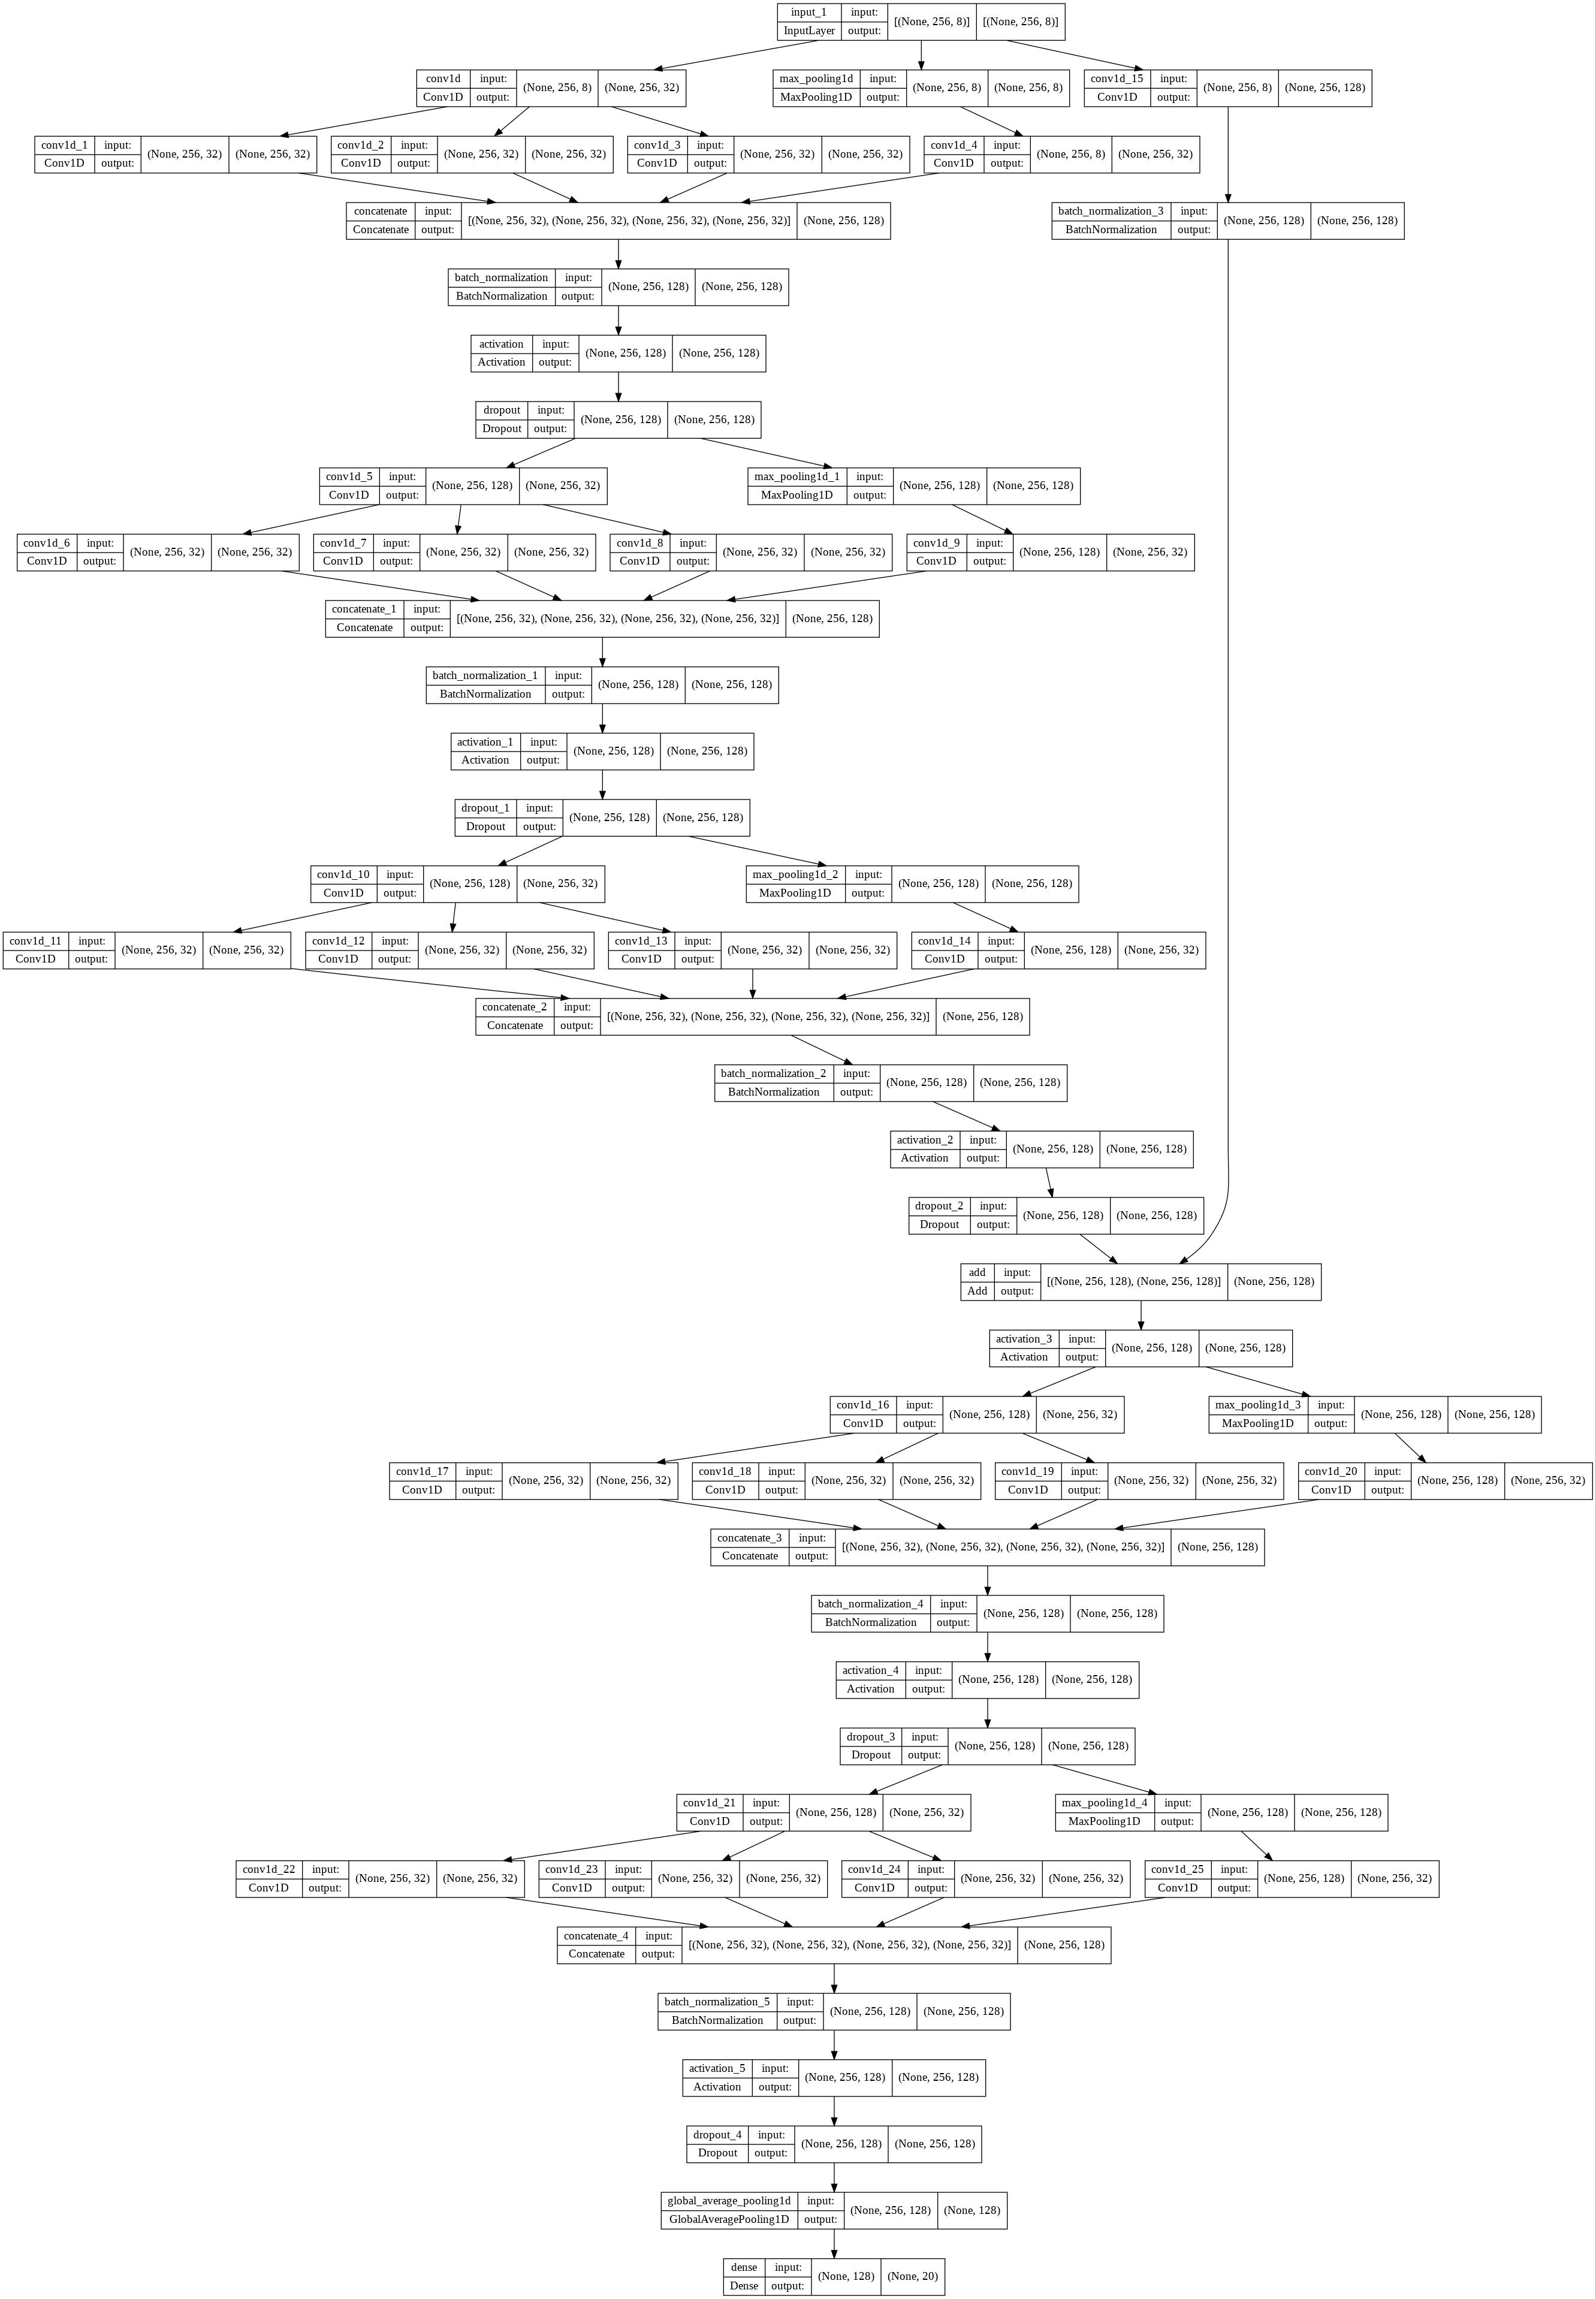

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(inception.model, to_file="model_fig.jpg", show_shapes=True)

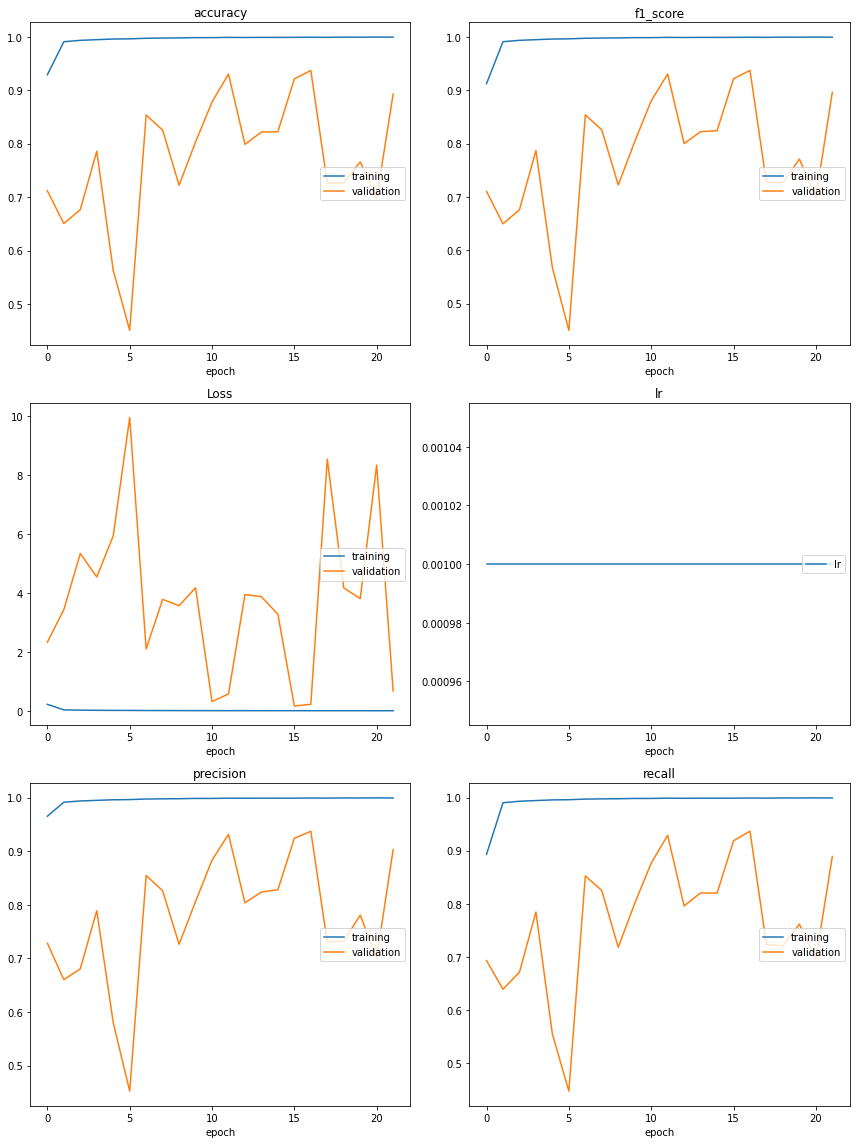

accuracy
	training         	 (min:    0.929, max:    0.999, cur:    0.999)
	validation       	 (min:    0.451, max:    0.937, cur:    0.893)
f1_score
	training         	 (min:    0.912, max:    0.999, cur:    0.999)
	validation       	 (min:    0.450, max:    0.937, cur:    0.896)
Loss
	training         	 (min:    0.002, max:    0.220, cur:    0.003)
	validation       	 (min:    0.162, max:    9.944, cur:    0.670)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
precision
	training         	 (min:    0.965, max:    0.999, cur:    0.999)
	validation       	 (min:    0.452, max:    0.937, cur:    0.903)
recall
	training         	 (min:    0.893, max:    0.999, cur:    0.999)
	validation       	 (min:    0.448, max:    0.937, cur:    0.889)
2400/2400 [==============================] - 217s 90ms/step - loss: 0.0029 - accuracy: 0.9992 - precision: 0.9992 - recall: 0.9991 - f1_score: 0.9991 - val_loss: 0.6699 - val_accuracy: 0.8927 - val_precision: 0.9027 - val_recall: 0

In [ ]:
history = inception.fit(X_train, y_train, X_test, y_test)

In [ ]:
def plot_loss_accuracy(history):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'g',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

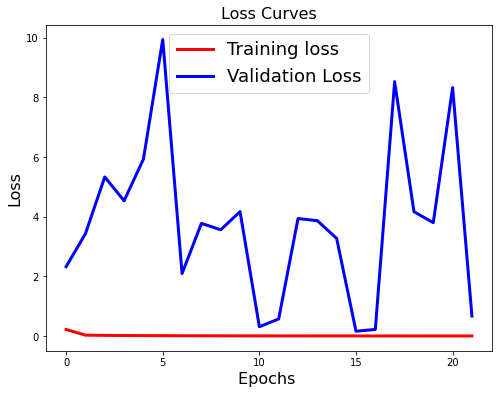

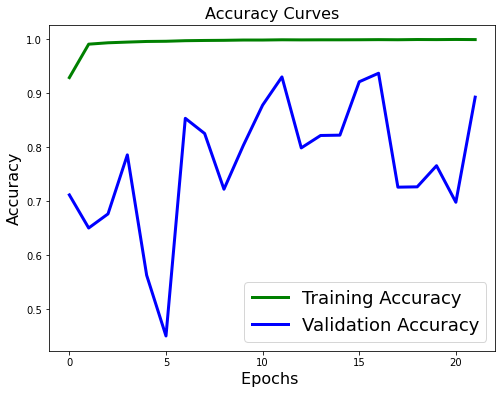

In [ ]:
plot_loss_accuracy(history)

In [ ]:
file_path = os.path.join(weights_directory, "best_weights.h5")
print(file_path)
inception.model.load_weights(file_path)

best_weights.h5


In [ ]:
with tf.device('/device:GPU:0'):
  inception.model.evaluate(X_train, y_train)

4799/4799 [==============================] - 102s 19ms/step - loss: 0.6693 - accuracy: 0.8936 - precision: 0.9032 - recall: 0.8901 - f1_score: 0.8965


In [ ]:
with tf.device('/device:GPU:0'):
    inception.model.evaluate(X_test, y_test)

1200/1200 [==============================] - 23s 19ms/step - loss: 0.6699 - accuracy: 0.8927 - precision: 0.9027 - recall: 0.8891 - f1_score: 0.8958


In [ ]:
with tf.device('/device:GPU:0'):
  y_hat = inception.model.predict(X_test)

In [ ]:
y_hat = np.argmax(y_hat, axis=1)
y_hat

array([ 1, 10,  3, ...,  1,  7,  8])

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_test

array([ 1, 10,  3, ...,  1,  7,  8])

In [ ]:
print_score(y_test, y_hat)

Accuracy:  0.8926859762450511

Macro precision_recall_fscore_support (macro) average
(0.8920388205772287, 0.9024305921121194, 0.8770131091953097, None)

Macro precision_recall_fscore_support (micro) average
(0.8926859762450511, 0.8926859762450511, 0.8926859762450511, None)

Macro precision_recall_fscore_support (weighted) average
(0.9748257507927849, 0.8926859762450511, 0.9080855806082926, None)

Confusion Matrix
[[1856    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1911    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0 1926    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0 1930    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0 1942    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [  16    0    0    0    0 1875    0    0    0    0    0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe